In [13]:
#import libraries
from cProfile import label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns

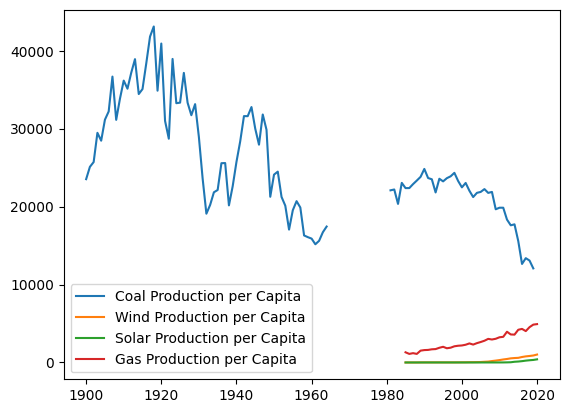

In [2]:
#read in data file
data = pd.read_csv("WorldEnergyConsumption.csv", header = 0, index_col = 0)
#filter data
usadata = data[data["country"] == "United States"]
usapowerdata = usadata[["year","coal_prod_per_capita","wind_elec_per_capita","solar_elec_per_capita","gas_elec_per_capita"]]

#plot
plt.plot(usapowerdata["year"],usapowerdata["coal_prod_per_capita"], label="Coal Production per Capita")
plt.plot(usapowerdata["year"],usapowerdata["wind_elec_per_capita"], label="Wind Production per Capita")
plt.plot(usapowerdata["year"],usapowerdata["solar_elec_per_capita"], label="Solar Production per Capita")
plt.plot(usapowerdata["year"],usapowerdata["gas_elec_per_capita"], label="Gas Production per Capita")
plt.legend(loc="lower left")

<AxesSubplot:xlabel='gdp', ylabel='coal_prod_per_capita'>

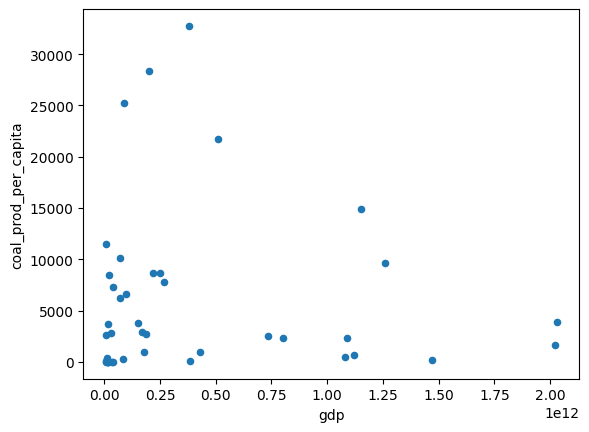

In [7]:
#data cleaning
#filter out rows without gdp data
coalgdp = data[data["gdp"] > 0]
#filter out rows without coal production data
coalgdp = coalgdp[coalgdp["coal_prod_per_capita"] > 0]
#pick a given year to reduce noise
coalgdp = coalgdp[coalgdp["year"] == 2000]
#drop outliers
coalgdp = coalgdp.sort_values("coal_prod_per_capita")
coalgdp.drop(index=coalgdp.index[-1],
    axis=0,
    inplace=True)
#drop other outliers
coalgdp = coalgdp.sort_values("gdp")
coalgdp.drop(coalgdp.tail(5).index,
    axis=0,
    inplace=True)

coalgdp.plot.scatter("gdp","coal_prod_per_capita")


There's not much correlation or standard distribution in this data since it's a time series, so the following outputs are mostly useless

                           year  coal_prod_per_capita  wind_elec_per_capita  \
year                   1.000000             -0.698141              0.858921   
coal_prod_per_capita  -0.698141              1.000000             -0.971087   
wind_elec_per_capita   0.858921             -0.971087              1.000000   
solar_elec_per_capita  0.668448             -0.885423              0.897477   
gas_elec_per_capita    0.973965             -0.900953              0.930311   

                       solar_elec_per_capita  gas_elec_per_capita  
year                                0.668448             0.973965  
coal_prod_per_capita               -0.885423            -0.900953  
wind_elec_per_capita                0.897477             0.930311  
solar_elec_per_capita               1.000000             0.773122  
gas_elec_per_capita                 0.773122             1.000000  


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'coal_prod_per_capita'}>],
       [<AxesSubplot:title={'center':'wind_elec_per_capita'}>,
        <AxesSubplot:title={'center':'solar_elec_per_capita'}>],
       [<AxesSubplot:title={'center':'gas_elec_per_capita'}>,
        <AxesSubplot:>]], dtype=object)

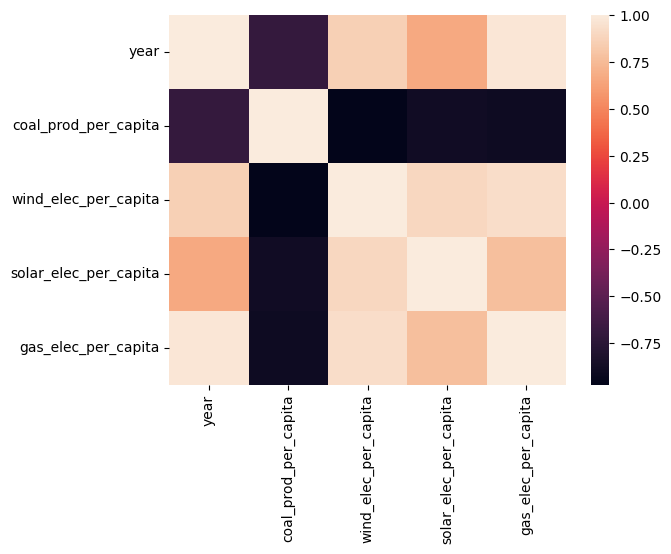

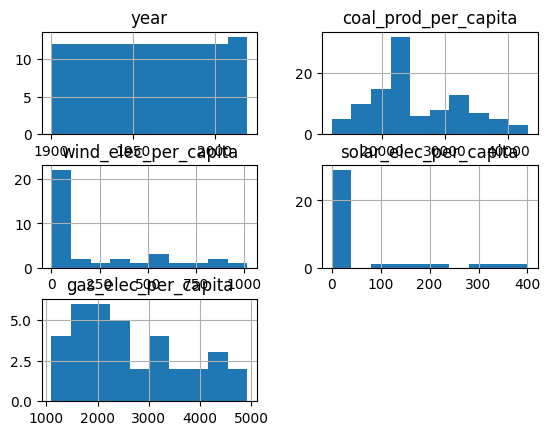

In [18]:
#EDA

corr = usapowerdata.corr()
print(corr)
sns.heatmap(corr)

usapowerdata.hist()

Revenue and Stock Price data for L3Harris Technologies

C:\Users\Qthooloo\AppData\Local\Temp\ipykernel_24360\723975367.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  LHXData["Revenue"] = LHXData["Revenue"].str.replace("$","")


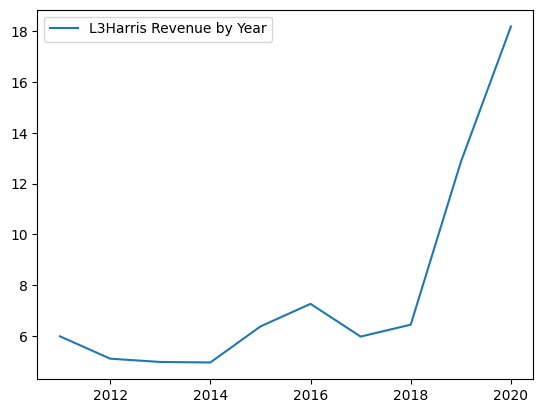

In [39]:
dcdata = pd.read_csv("defenseContractor.csv", header = 0, index_col = None) # read in data
LHXData = dcdata[dcdata["Symbol"] == "LHX"] # filter out other companies
# filter our all but last 10 years of available revenue data
LHXData = LHXData[LHXData["Year"] <= 2020] 
LHXData = LHXData[LHXData["Year"] >= 2011]
# convert data from string to float value
LHXData["Revenue"] = LHXData["Revenue"].str.replace("$","") 
LHXData["Revenue"] = LHXData["Revenue"].str.replace("B","")
LHXData["Revenue"] = LHXData.Revenue.astype(float)

plt.plot(LHXData["Year"], LHXData["Revenue"], label="L3Harris Revenue by Year")
plt.legend(loc="upper left")

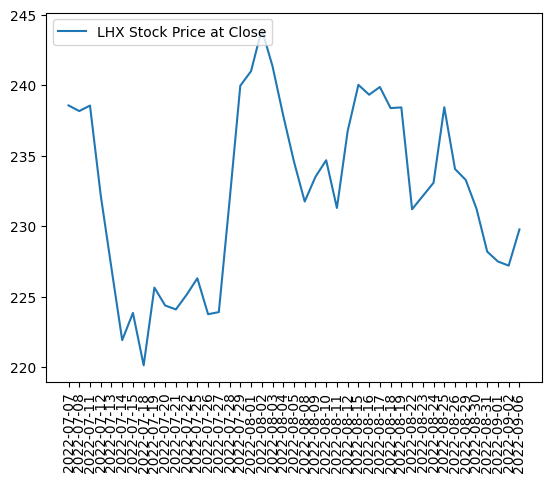

In [43]:
lhxstockdata = pd.read_csv("LHXStock.csv", header = 0, index_col = None) # read in data
plt.plot(lhxstockdata["Date"], lhxstockdata["Close"], label="LHX Stock Price at Close")
plt.xticks(rotation = 90) # Make labels more readable
plt.legend(loc="upper left")

Supervised Learning
1. Labelling of Data
Inputs - Labelled training data, unlabelled production data
Outputs - Labelled production data
Approach - Feed the model pre-labelled data, test it against validation data, and ensure the accuracy on each dataset is similar.

2. Forecasting
Inputs - Historical Data with Dependent and Independent variables
Outputs - Forecasted Future values based on previous trends
Approach - Split historical data into training and validation sets, verify that your model makes sense, then verify that training and validation accuracy is similar

Unsupervised Learning
1. Categorization of Data
Inputs - A set of data and a desired number of categories
Outputs - Usually some sort of visualization and a compiled list of the data broken down into categories
Approach - Plug a dataset into a clustering model

2. "You might also like.."
Inputs - Transaction data from previous sales and buyers
Outputs - Items that a shopper may be interested based on the habits of other shoppers
Approach - Create model that can search for what items are frequently bought together with items in the shoppers cart

Reinforcement Learning
1. Advertising
Inputs - User Data, Ad response data
Output - More targeted ads with higher user engagement
Approach - Measure user response to different types of ads and try new ones based on user data and increases or decreases in Ad engagement

2. Chat bots
Inputs - Databases of previous conversations, user inputs
Output - Natural responses based on new user inputs
Approach - As the model sees more user responses to its outputs, it can learn to more closely imitate the response that a user might have to the same prompt

